In [49]:
import numpy as np
import pandas as pd
import sklearn

In [48]:
import pandas as pd
with pd.option_context('display.precision', 10):
    df = pd.read_csv("NGSIM__Lankershim_Vehicle_Trajectories.csv", float_precision = 'high')
    print(df.Global_Time)
    

0          1118935680200
1          1118935680300
2          1118935680400
3          1118935680500
4          1118935680600
               ...      
1607314    1118937250900
1607315    1118937251000
1607316    1118937251100
1607317    1118937251200
1607318    1118937251300
Name: Global_Time, Length: 1607319, dtype: int64


In [50]:
# read the data file and transfer into DataFrame
raw_data = pd.read_csv('NGSIM__Lankershim_Vehicle_Trajectories.csv')
raw_df = pd.DataFrame(raw_data)
raw_df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,63,3,394,1118935680200,44.589,67.404,6451974.592,1872844.458,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
1,63,4,394,1118935680300,44.589,67.404,6451974.592,1872844.458,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
2,63,5,394,1118935680400,44.624,67.904,6451974.815,1872844.906,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
3,63,6,394,1118935680500,44.659,68.402,6451975.037,1872845.354,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
4,63,7,394,1118935680600,44.140,69.129,6451974.835,1872846.224,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607314,1603,5510,178,1118937250900,42.529,1273.409,6452476.070,1873947.779,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607315,1603,5511,178,1118937251000,44.436,1272.763,6452477.624,1873946.615,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607316,1603,5512,178,1118937251100,46.627,1271.907,6452479.506,1873944.983,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607317,1603,5513,178,1118937251200,48.079,1270.967,6452480.602,1873943.645,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim


In [64]:
# select intersection 1 & southbound
# Direction: 1E2N3W4S
# Movement: 1TH, 2LT, 3RT

intID = 1

df = raw_df.loc[(raw_df['Int_ID'] == intID)]
TH_df = df.loc[df['Movement'] == 1]
LT_df = df.loc[df['Movement'] == 2]
nVTH = len(set(TH_df.Vehicle_ID))
nVLT = len(set(LT_df.Vehicle_ID))
print(nVTH, nVLT)           # number of vehicles in each movement


889 33


In [65]:
# sort and pre-normalize the global time

LT_df.Global_Time = (LT_df.Global_Time - min(LT_df['Global_Time']))/1000 # unit changed to seconds
len(LT_df.Global_Time)

/var/folders/7_/666lkg6n0rxbnkbqpx1j3vw00000gn/T/ipykernel_69230/1155081192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LT_df.Global_Time = (LT_df.Global_Time - min(LT_df['Global_Time']))/1000


3020

1906.0

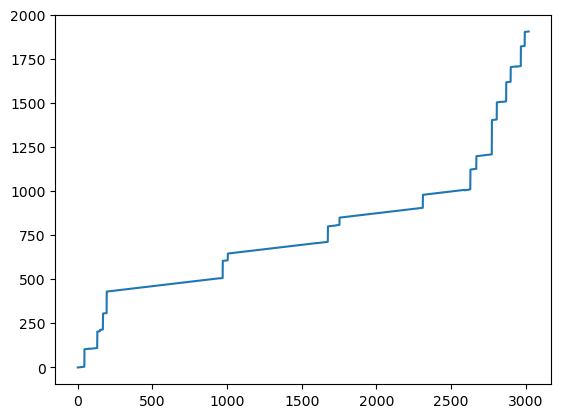

In [67]:
# plot the Global_Time
import matplotlib.pyplot as mp
number = np.arange(0,3020)
mp.plot(number, LT_df.Global_Time)
max(LT_df.Global_Time) # time spans